In [1]:
import torch

In [2]:
import sys
sys.path.append('clustering/')
from utils import *
import os

In [3]:
checkpoint = torch.load(os.path.join(get_data_dir(), '2010s', 'BERT/checkpoint-epoch=2_min_count_50.ckpt'))

data_dir:  /home/lyuzhuoqi/projects/clustering/data


/tmp/ipykernel_1277994/3581299288.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(os.path.join(get_data_dir(), '2010s', 'BERT/checkpoint-epoch=2_

In [7]:
import pickle
with open(os.path.join(get_data_dir(), '2010s', 'BERT', 'pid_to_idx_min_count_50.pkl'), 'rb') as f:
    pid_to_idx = pickle.load(f)
pid_to_idx

data_dir:  /home/lyuzhuoqi/projects/clustering/data


{'<pad>': 0,
 '<mask>': 1,
 0: 2,
 61661: 3,
 81127: 4,
 146206: 5,
 146344: 6,
 161885: 7,
 182001: 8,
 229566: 9,
 234478: 10,
 235346: 11,
 255146: 12,
 260102: 13,
 261554: 14,
 267729: 15,
 282835: 16,
 284573: 17,
 285199: 18,
 316438: 19,
 323237: 20,
 331060: 21,
 336866: 22,
 356733: 23,
 357931: 24,
 362129: 25,
 387551: 26,
 402139: 27,
 406924: 28,
 412057: 29,
 414566: 30,
 445011: 31,
 452692: 32,
 453935: 33,
 454503: 34,
 464037: 35,
 465895: 36,
 473813: 37,
 481605: 38,
 487226: 39,
 500190: 40,
 524341: 41,
 531269: 42,
 548917: 43,
 559566: 44,
 568598: 45,
 579031: 46,
 587692: 47,
 603496: 48,
 607880: 49,
 611060: 50,
 630694: 51,
 640450: 52,
 658968: 53,
 660994: 54,
 661825: 55,
 678965: 56,
 710002: 57,
 720488: 58,
 728652: 59,
 733369: 60,
 744042: 61,
 766161: 62,
 782382: 63,
 802930: 64,
 810424: 65,
 815301: 66,
 836864: 67,
 883815: 68,
 889322: 69,
 896049: 70,
 896174: 71,
 900338: 72,
 920941: 73,
 927508: 74,
 945443: 75,
 955875: 76,
 961603: 77,


In [9]:
pid_to_idx.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

# Use word embedding layer

In [ ]:
checkpoint['state_dict'].keys()

odict_keys(['model.roberta.embeddings.word_embeddings.weight', 'model.roberta.embeddings.position_embeddings.weight', 'model.roberta.embeddings.token_type_embeddings.weight', 'model.roberta.embeddings.LayerNorm.weight', 'model.roberta.embeddings.LayerNorm.bias', 'model.roberta.encoder.layer.0.attention.self.query.weight', 'model.roberta.encoder.layer.0.attention.self.query.bias', 'model.roberta.encoder.layer.0.attention.self.key.weight', 'model.roberta.encoder.layer.0.attention.self.key.bias', 'model.roberta.encoder.layer.0.attention.self.value.weight', 'model.roberta.encoder.layer.0.attention.self.value.bias', 'model.roberta.encoder.layer.0.attention.output.dense.weight', 'model.roberta.encoder.layer.0.attention.output.dense.bias', 'model.roberta.encoder.layer.0.attention.output.LayerNorm.weight', 'model.roberta.encoder.layer.0.attention.output.LayerNorm.bias', 'model.roberta.encoder.layer.0.intermediate.dense.weight', 'model.roberta.encoder.layer.0.intermediate.dense.bias', 'model.ro

In [ ]:
checkpoint['state_dict']['model.roberta.embeddings.word_embeddings.weight'].shape

In [ ]:
from sklearn.manifold import TSNE
emb_2d = TSNE(n_components=2).fit_transform(checkpoint['state_dict']['model.roberta.embeddings.word_embeddings.weight'].detach().cpu().numpy())

# Use the second to the last layer

In [11]:
from torch.utils.data import Dataset, DataLoader
import lightning as pl
from transformers import RobertaForMaskedLM, RobertaConfig
from torch.optim import AdamW

# 定义数据集
class CitationTrailDataset(Dataset):
    def __init__(self, citation_trails, pid_to_idx, max_length=10, pad_value=0):
        self.citation_trails = citation_trails
        self.pid_to_idx = pid_to_idx
        self.max_length = max_length
        self.pad_value = pad_value

    def __len__(self):
        return len(self.citation_trails)

    def __getitem__(self, idx):
        trail = self.citation_trails[idx]
        trail = [self.pid_to_idx.get(pid, self.pad_value) for pid in trail] # 未知 PID (出现次数小于min_count) 用 pad_value 替换
        if len(trail) > self.max_length:
            trail = trail[:self.max_length]
        trail += [self.pad_value] * (self.max_length - len(trail))
        return torch.tensor(trail, dtype=torch.long)

# PyTorch Lightning 模型
class CitationTrailModel(pl.LightningModule):
    def __init__(self, pid_to_idx, max_length=10, learning_rate=5e-5, batchsize=2048):
        super().__init__()
        # 配置模型
        num_pids = len(pid_to_idx)
        self.pad_value = pid_to_idx['<pad>']
        
        # 初始化模型
        config = RobertaConfig(
            vocab_size=num_pids,
            pad_token_id=self.pad_value,
            hidden_size=768,
            num_hidden_layers=12,
            num_attention_heads=12,
            intermediate_size=3072,
            max_position_embeddings=514,
        )
        self.model = RobertaForMaskedLM(config=config)
        
        # 初始化优化器的学习率
        self.learning_rate = learning_rate

        # 训练用的数据集
        self.pid_to_idx = pid_to_idx
        self.max_length = max_length
        self.batchsize = batchsize

    def forward(self, input_ids, attention_mask, labels):
        return self.model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)

    def training_step(self, batch):
        # 提取输入
        inputs = batch
        attention_mask = (inputs != self.pad_value).long()
        
        # 准备标签
        labels = inputs.clone()
        rand = torch.rand(inputs.shape, device='cuda')
        mask_arr = (rand < 0.15) * (labels != self.pad_value)

        # 如果没有被掩盖的 token，手动掩盖一个
        if mask_arr.sum() == 0:
            non_pad_indices = (labels != self.pad_value).nonzero(as_tuple=False)
            if non_pad_indices.numel() > 0:
                idx = non_pad_indices[torch.randint(0, non_pad_indices.size(0), (1,)).item()]
                mask_arr[idx[0], idx[1]] = True

        # 更新 labels
        labels[~mask_arr] = -100

        # 替换被掩盖的 token 为 <mask>
        inputs[mask_arr] = self.pid_to_idx['<mask>']

        # 前向传播
        outputs = self.model(input_ids=inputs, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        
        return loss

    def configure_optimizers(self):
        optimizer = AdamW(self.model.parameters(), lr=self.learning_rate)
        return optimizer

    def train_dataloader(self):
        with open("citation_trails.pkl", "rb") as f:
            citation_trail = pickle.load(f)
        dataset = CitationTrailDataset(citation_trail, self.pid_to_idx, max_length=self.max_length, pad_value=self.pid_to_idx['<pad>'])
        dataloader = DataLoader(dataset, batch_size=self.batchsize, shuffle=True)
        return dataloader

    def on_epoch_end(self):
        # 可以在每个 epoch 结束时打印一些信息
        pass

/home/lyuzhuoqi/miniconda3/envs/p2v/lib/python3.11/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
def get_all_embeddings(checkpoint_path, indices):
    """
    从checkpoint加载模型并获取所有索引的倒数第二层输出
    
    Args:
        checkpoint_path (str): 模型checkpoint的路径
        indices (list): 要处理的索引列表
    
    Returns:
        torch.Tensor: 倒数第二层的输出张量，shape为[len(indices), 768]
    """
    # 加载模型
    model = CitationTrailModel.load_from_checkpoint(checkpoint_path, pid_to_idx=pid_to_idx)
    
    # 将模型设置为评估模式
    model.eval()
    
    # 如果有GPU则使用GPU
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    # 将索引列表转换为二维tensor，每个索引单独成行
    input_tensor = torch.tensor([[idx] for idx in indices], dtype=torch.long).to(device)
    
    # 创建注意力掩码
    attention_mask = torch.ones_like(input_tensor)
    
    # 获取embeddings
    with torch.no_grad():
        outputs = model.model(
            input_ids=input_tensor,
            attention_mask=attention_mask,
            output_hidden_states=True
        )
        
        # 获取倒数第二层的输出
        embeddings = outputs.hidden_states[-2]  # shape: [len(indices), 1, hidden_size]
        
        # 去除多余的维度
        embeddings = embeddings.squeeze(1)  # shape: [len(indices), hidden_size]
        
    return embeddings.cpu()


In [ ]:
# 使用示例：
indices = list(pid_to_idx.values())
embeddings = get_all_embeddings(
    checkpoint_path=os.path.join(get_data_dir(), '2010s', 'BERT/checkpoint-epoch=2_min_count_50.ckpt'),
    indices=indices
)

print(f"Embeddings shape: {embeddings.shape}")  # 应该输出 torch.Size([len(indices), 768])

data_dir:  /home/lyuzhuoqi/projects/clustering/data
Embeddings shape: torch.Size([37596, 768])


In [26]:
from sklearn.manifold import TSNE
emb_2d = TSNE(n_components=2).fit_transform(embeddings.numpy())

In [27]:
import pandas as pd
plot_df = pd.DataFrame(emb_2d, columns=['x', 'y'])
plot_df['vid'] = list(pid_to_idx.keys())
plot_df.drop(plot_df[plot_df['vid'].isin(['<pad>', '<mask>'])].index, inplace=True)
plot_df = plot_df.merge(pd.read_parquet(os.path.join(get_data_dir(), 'MAG_venue.parquet'))[['OriginalVenue', 'VenueType']], left_on='vid', right_index=True)
plot_df.rename(columns={'OriginalVenue': 'venue', 'VenueType': 'type'}, inplace=True)
plot_df

data_dir:  /home/lyuzhuoqi/projects/clustering/data


,x,y,vid,venue,type
3,-26.738422,-105.966949,61661,Journal of Prosthodontics,Journal
4,-46.425526,-83.593552,81127,European Heart Journal Supplements,Journal
5,-6.362301,-69.217247,146206,Journal of Carcinogenesis,Journal
6,-73.732651,25.138760,146344,Journal of Marriage and Family,Journal
7,-4.081148,5.806166,161885,Chinese Studies in History,Journal
...,...,...,...,...,...
37591,-65.399033,-12.010145,3207271027,The Educational and Developmental Psychologist,Journal
37592,-52.971279,57.597496,3207369193,Journal of First-generation Student Success,Journal
37593,-56.645981,71.204979,3207474444,Journal of Statistics and Data Science Education,Journal
37594,-81.544518,-24.133120,3207635824,Journal of LGBTQ Issues in Counseling,Journal


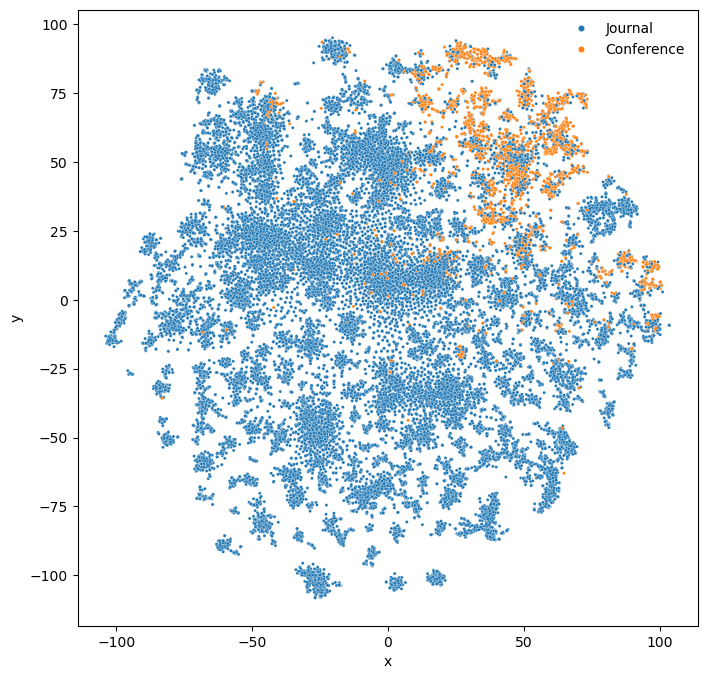

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.scatterplot(data=plot_df, x='x', y='y', hue='type', s=5)
plt.legend(frameon=False, markerscale=2)

In [29]:
cluster_df = pd.read_parquet(os.path.join(get_data_dir(), '2010s', 'clustering_results', 'cluster_df.parquet'))
plot_df = plot_df.merge(cluster_df['Scopus_label'], left_on='vid', right_index=True)
plot_df

data_dir:  /home/lyuzhuoqi/projects/clustering/data


,x,y,vid,venue,type,Scopus_label
3,-26.738422,-105.966949,61661,Journal of Prosthodontics,Journal,Dentistry
4,-46.425526,-83.593552,81127,European Heart Journal Supplements,Journal,Medicine
5,-6.362301,-69.217247,146206,Journal of Carcinogenesis,Journal,Medicine
6,-73.732651,25.138760,146344,Journal of Marriage and Family,Journal,Social Sciences
7,-4.081148,5.806166,161885,Chinese Studies in History,Journal,Arts and Humanities
...,...,...,...,...,...,...
37588,-81.141312,-7.843808,3206652469,Dialogues in Clinical Neuroscience,Journal,Medicine
37590,-29.101028,-18.508772,3207227496,Journal of the International Society of Sports...,Journal,Nursing
37591,-65.399033,-12.010145,3207271027,The Educational and Developmental Psychologist,Journal,Psychology
37593,-56.645981,71.204979,3207474444,Journal of Statistics and Data Science Education,Journal,Social Sciences


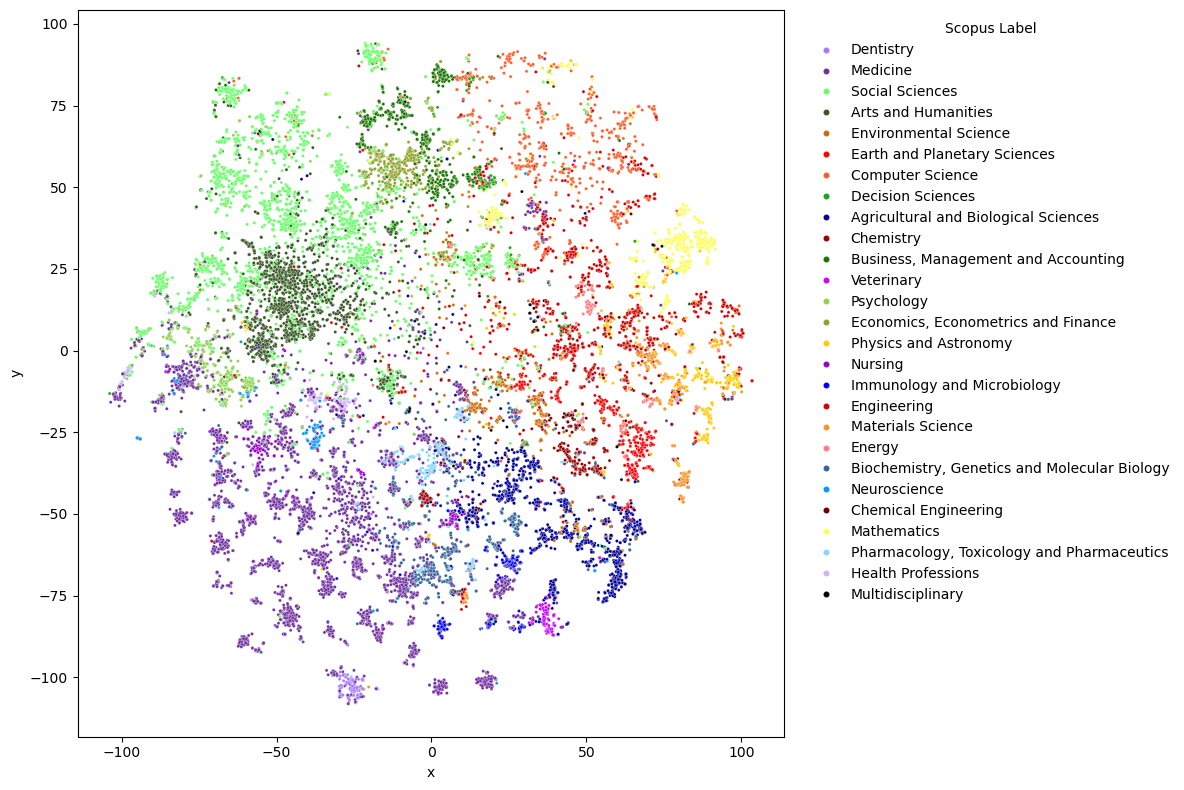

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specific size
fig = plt.figure(figsize=(12, 8))

# Create the main scatter plot in the left part
ax_scatter = plt.subplot2grid((1, 5), (0, 0), colspan=4)
scatter = sns.scatterplot(data=plot_df, x='x', y='y', s=5, hue='Scopus_label', palette=Scopus2color, ax=ax_scatter)
ax_scatter.legend_.remove()  # Remove the legend from the scatter plot

# Create a separate axis for the legend on the right
ax_legend = plt.subplot2grid((1, 5), (0, 4))
handles, labels = scatter.get_legend_handles_labels()
ax_legend.legend(handles, labels, title='Scopus Label', frameon=False,
                 bbox_to_anchor=(0, 1), loc='upper left', markerscale=2)
ax_legend.axis('off')  # Hide the axis

plt.tight_layout()

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=26, random_state=42).fit(embeddings.numpy())
kmeans.labels_

array([ 1, 18, 22, ...,  2, 24, 20], dtype=int32)

In [32]:
import pandas as pd

bert_kmeans_df = pd.DataFrame(kmeans.labels_, columns=['bert_kmeans_label'])
bert_kmeans_df['vid'] = list(pid_to_idx.keys())
bert_kmeans_df.drop(bert_kmeans_df[bert_kmeans_df['vid'].isin(['<pad>', '<mask>'])].index, inplace=True)
bert_kmeans_df = bert_kmeans_df.merge(pd.read_parquet(os.path.join(get_data_dir(), 'MAG_venue.parquet'))[['OriginalVenue', 'VenueType']], left_on='vid', right_index=True)
bert_kmeans_df.rename(columns={'OriginalVenue': 'venue', 'VenueType': 'type'}, inplace=True)
bert_kmeans_df.set_index('vid', inplace=True)
bert_kmeans_df

data_dir:  /home/lyuzhuoqi/projects/clustering/data


,bert_kmeans_label,venue,type
vid,,,
61661,9,Journal of Prosthodontics,Journal
81127,20,European Heart Journal Supplements,Journal
146206,10,Journal of Carcinogenesis,Journal
146344,24,Journal of Marriage and Family,Journal
161885,1,Chinese Studies in History,Journal
...,...,...,...
3207271027,24,The Educational and Developmental Psychologist,Journal
3207369193,2,Journal of First-generation Student Success,Journal
3207474444,2,Journal of Statistics and Data Science Education,Journal


In [33]:
cluster_df = pd.read_parquet(os.path.join(get_data_dir(), '2010s', 'clustering_results', 'cluster_df.parquet'))
cluster_df.drop(columns=['bert_kmeans_label'], inplace=True)
cluster_df = cluster_df.merge(bert_kmeans_df['bert_kmeans_label'], left_index=True, right_index=True)
cluster_df

data_dir:  /home/lyuzhuoqi/projects/clustering/data


,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance,spectral_label,n2v_kmeans_label,cm_kmeans_label,gnn_kmeans_label,bert_kmeans_label
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711,24,3,21,0,0
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494,24,20,21,0,3
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081,24,20,21,0,0
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582,24,20,21,0,3
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758,14,4,24,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015,8,18,1,19,1
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642,21,5,1,14,1
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660,21,5,1,14,1
121509672,Agricultural and Biological Sciences,5,0.179111,-36.757057,-0.591017,21,0.430040,16,0.207435,10,5,1,10,1


In [34]:
cluster_df.to_parquet(os.path.join(get_data_dir(), '2010s', 'clustering_results', 'cluster_df.parquet'))

data_dir:  /home/lyuzhuoqi/projects/clustering/data
